In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

In [2]:
#first open the file with the mean wage in michigan in period from 1985 to 2017
wage_mich2=pd.read_excel('MEHOINUSNYA672N.xls', skiprows=11,skipfooter=1)
wage_mich2.columns=['year','wage']               #rename the columns 
wage_mich2['year']=wage_mich2['year'].dt.year         #only leave the year  
wage_mich2['year']=wage_mich2['year'].astype(int)     #change the type to integer 

In [3]:
#second open the file with the mean vale of wage in the US
wage_us=pd.read_excel('Median Household Income in the United States.xls', skiprows=11,skipfooter=1)
wage_us.columns=['year','wage']               #rename the columns 
wage_us['year']=wage_us['year'].dt.year         #only leave the year  
wage_us['year']=wage_us['year'].astype(int)     #change the type to integer 

In [4]:
#third open the file with the minimum wage in the US
row_remove=[1,2,3,4]
for i in range(38,80):
    row_remove.append(i)    #rows to remove
wage_min = pd.read_csv("National+minimum+wage+per+month.csv", skiprows=row_remove).drop(['Unnamed: 2'], axis=1)                                                                                     
wage_min.columns=['year','wage per month']               #rename the columns 
wage_min['wage per month']=wage_min['wage per month'].str.replace(",","").astype(float)
wage_min['wage per year']=wage_min['wage per month']*12
wage_min = wage_min.iloc[::-1]    #reverse the rows

<IPython.core.display.Javascript object>


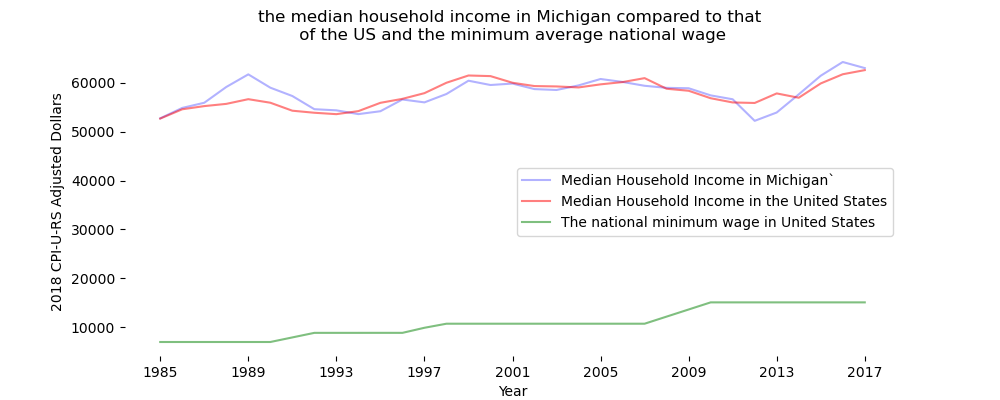

In [5]:
#lists to be plot
year=np.arange(1985, 2018, 4).tolist()
loc=np.arange(0, 34, 4).tolist()
mich_list=wage_mich2['wage'].tolist()
us_list=wage_us['wage'].tolist()
min_list=wage_min['wage per year'].tolist()




#plot the three curves
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k') #set the graph to a rect shape

plt.xticks(loc, year,rotation=0)
plt.plot(mich_list, '-',c='blue',alpha=0.3,label='Median Household Income in Michigan`')
plt.plot(us_list, '-',c='red',alpha=0.5,label='Median Household Income in the United States')
plt.plot(min_list,'-',c='green',alpha=0.5,label='The national minimum wage in United States')



#add labels to the graph
plt.xlabel('Year')
plt.ylabel('2018 CPI-U-RS Adjusted Dollars')
plt.title('the median household income in Michigan compared to that \n of the US and the minimum average national wage ')
plt.legend()



# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
